# Part 1 : Support Vector Machines
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

#from sklearn import svm
#from sklearn import metrics
#from sklearn.grid_search import GridSearchCV
#from sklearn.linear_model import LogisticRegression

import __init__ as __

# Loading and Visualizing Data
---
We start the exercise by first loading and visualizing the dataset.   
The following code will load the dataset into your environment and plot the data.

In [2]:
# Loading and Visualizing Data
# Load from ex6data1: You will have X, y in your environment
mat = sio.loadmat('ex6data1.mat');
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2']);
data['y'] = mat.get('y');
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


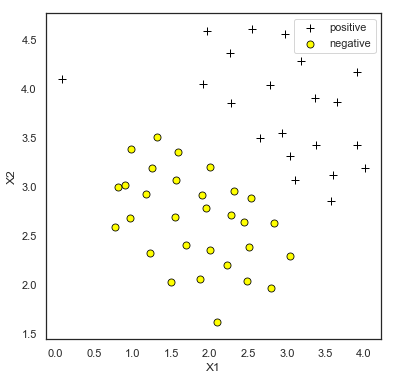

In [4]:
# plots the data points with + for the positive examples and o for the negative examples. 
# X is assumed to be a Mx2 matrix.
sns.set(context="notebook", style="white")

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
ax.legend(loc=0)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# Training Linear SVM
---
The following code will train a linear SVM on the dataset and plot the decision boundary learned.

In [5]:
# Loading and Visualizing Data
# Load from ex6data1: You will have X, y in your environment
mat = sio.loadmat('ex6data1.mat');
X = mat.get('X')
y = mat.get('y')

# You should try to change the C value below 
# and see how the decision boundary varies (e.g., try C = 1000)
model1 = __.svmTrain(X, y, C=1,    kernel='linear', sigma=0.1, tol=1e-3, max_passes=20)
model2 = __.svmTrain(X, y, C=10,   kernel='linear', sigma=0.1, tol=1e-3, max_passes=20)
model3 = __.svmTrain(X, y, C=100,  kernel='linear', sigma=0.1, tol=1e-3, max_passes=20)
model4 = __.svmTrain(X, y, C=1000, kernel='linear', sigma=0.1, tol=1e-3, max_passes=20)


Training ...
...................................................................

........................... Done! 



Training ...
...................................................................

...............................................................................

....................................... Done! 



Training ...
...................................................................

...............................................................................

...............................................................................

...............................................................................

...............................................................................

...............................................................................

...............................................................................

...............................................................................

.................

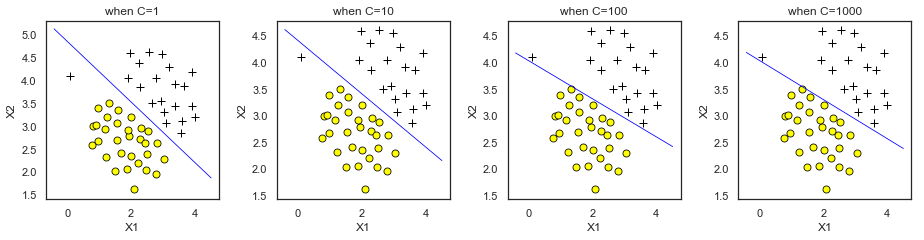

In [6]:
#fig, ax = plt.subplots(figsize=(6,6))
fig = plt.figure(num=1, figsize=(13,3.5))

ax1 = fig.add_subplot(141)
# plots the data points
ax1.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax1.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
#ax1.legend(loc=3)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('when C=1')
# plots a linear decision boundary learned by the SVM and overlays the data on it
w = model1['w'];
b = model1['b'];
x1 = np.linspace(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5, 2);
x2 = - (w[0] * x1 + b) / w[1];
plt.plot(x1, x2, c='Blue', linewidth=0.8, label='Decision Boundary')

ax2 = fig.add_subplot(142)
# plots the data points
ax2.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax2.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
#ax2.legend(loc=3)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('when C=10')
# plots a linear decision boundary learned by the SVM and overlays the data on it
w = model2['w'];
b = model2['b'];
x1 = np.linspace(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5, 2);
x2 = - (w[0] * x1 + b) / w[1];
plt.plot(x1, x2, c='Blue', linewidth=0.8, label='Decision Boundary')

ax3 = fig.add_subplot(143)
# plots the data points
ax3.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax3.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
#ax3.legend(loc=3)
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('when C=100')
# plots a linear decision boundary learned by the SVM and overlays the data on it
w = model3['w'];
b = model3['b'];
x1 = np.linspace(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5, 2);
x2 = - (w[0] * x1 + b) / w[1];
plt.plot(x1, x2, c='Blue', linewidth=0.8, label='Decision Boundary')

ax4 = fig.add_subplot(144)
# plots the data points
ax4.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax4.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
#ax4.legend(loc=3)
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.set_title('when C=1000')
# plots a linear decision boundary learned by the SVM and overlays the data on it
w = model4['w'];
b = model4['b'];
x1 = np.linspace(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5, 2);
x2 = - (w[0] * x1 + b) / w[1];
plt.plot(x1, x2, c='Blue', linewidth=0.8, label='Decision Boundary')

fig.tight_layout()

plt.show()

# Implementing Gaussian Kernel
---
You will now implement the Gaussian kernel to use with the SVM. You should complete the code in gaussianKernel

In [7]:
x1=np.array([[1],[2],[1]]);
x2=np.array([[0],[4],[-1]]);
sigma=2;
sim = __.gaussianKernel(x1, x2, sigma); 
print('Gaussian Kernel between x1 = [[1],[2],[1]], x2 = [[0],[4],[-1]], sigma = {0} : \n\t{1}\n(for sigma = {0}, this value should be about 0.324652)\n'.format(sigma, sim));

Gaussian Kernel between x1 = [[1],[2],[1]], x2 = [[0],[4],[-1]], sigma = 2 : 
	0.32465246735834974
(for sigma = 2, this value should be about 0.324652)



# Visualizing Dataset 2
---
The following code will load the next dataset into your environment and plot the data. 

In [8]:
# Loading and Visualizing Data
# Load from ex6data2: You will have X, y in your environment
mat = sio.loadmat('ex6data2.mat');
X = mat.get('X')
y = mat.get('y')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [9]:
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2']);
data['y'] = mat.get('y');
data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


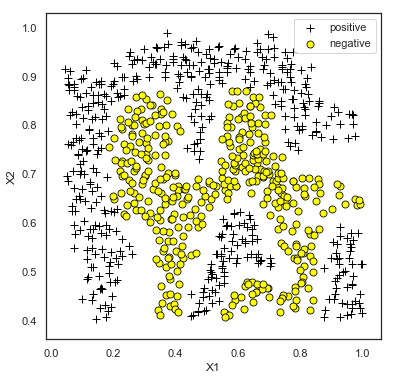

In [10]:
# plots the data points with + for the positive examples and o for the negative examples. 
# X is assumed to be a Mx2 matrix.
sns.set(context="notebook", style="white")

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
ax.legend(loc=0)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# Training SVM with RBF Kernel (Dataset 2)
---
After you have implemented the kernel, we can now use it to train the SVM classifier. Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...

In [11]:
model = __.svmTrain(X, y, C=1, kernel='gaussian', sigma=0.1, tol=1e-3, max_passes=5)


Training ...
...................................................................

...............................................................................

...............................................................................

...............................................................................

...............................................................................

...............................................................................

.......... Done! 




In [14]:
model.keys() # linear gaussian

dict_keys(['X', 'y', 'kernelFunction', 'sigma', 'b', 'alphas', 'w'])

<IPython.core.display.Javascript object>


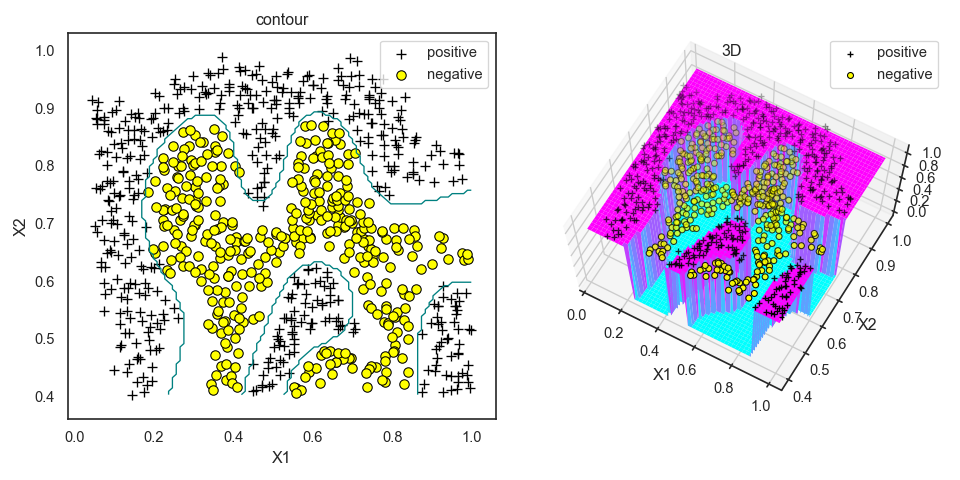

c:\workspace\installed\python\python36\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [12]:
%matplotlib notebook
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig = plt.figure(dpi=80, figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax1.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
ax1.legend(loc=0)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('contour')
# Make classification predictions over a grid of values
X1 = np.mgrid[np.min(X[:,0]):np.max(X[:,0]):100j]
X2 = np.mgrid[np.min(X[:,1]):np.max(X[:,1]):100j]
vals = np.zeros([100, 100])
for i in range(100):
    for j in range(100):
        this_X = np.vstack((X1[i], X2[j])).T
        vals[i, j] = __.svmPredict(model, this_X);
ax1.contour(X1, X2, vals.T, [1], linewidths=1, colors='teal')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(positive['X1'], positive['X2'], 1.05, linewidth=1, s=20, c='black', marker='+', label='positive')
ax2.scatter(negative['X1'], negative['X2'], 1.05, linewidth=0.8, s=20, c='yellow',edgecolors='black', marker='o', label='negative')
ax2.legend(loc=0)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('3D')
X3, X4 = np.mgrid[np.min(X[:,0]):np.max(X[:,0]):100j, np.min(X[:,1]):np.max(X[:,1]):100j]
X3 = X3.T; X4 = X4.T;
ax2.plot_surface(X3, X4, vals.T, linewidth=0.2, edgecolors = 'none', cmap=plt.cm.cool)

fig.tight_layout()
plt.show()

# Visualizing Dataset 3
---
The following code will load the next dataset into your environment and  plot the data. 

In [13]:
# Loading and Visualizing Data
# Load from ex6data3: You will have X, y ,yval, Xval in your environment
mat = sio.loadmat('ex6data3.mat');
X = mat.get('X')
y = mat.get('y')
Xval = mat.get('Xval')
yval = mat.get('yval')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [14]:
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2']);
data['y'] = mat.get('y');
data.head()

,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


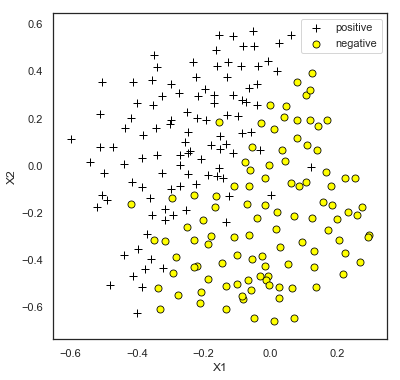

In [15]:
# plots the data points with + for the positive examples and o for the negative examples. 
# X is assumed to be a Mx2 matrix.
%matplotlib inline
sns.set(context="notebook", style="white")

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
ax.legend(loc=0)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# Training SVM with RBF Kernel (Dataset 3)
---
This is a different dataset that you can use to experiment with.   
Try different values of C and sigma here.

In [17]:
# Try different SVM Parameters here
[C, sigma, errors] = __.dataset3Params(X, y, Xval, yval);

C:\Workspace\git_project\Machine Learning\Machine-Learning-AndrewNg-Python3\ex6-SVM\__init__.py:70: RuntimeWarning: divide by zero encountered in power
  K = np.power(gaussianKernel(1, 0, sigma), K)
C:\Workspace\git_project\Machine Learning\Machine-Learning-AndrewNg-Python3\ex6-SVM\__init__.py:102: RuntimeWarning: invalid value encountered in multiply
  E[j] = b + np.sum(np.multiply(np.multiply(alphas, Y), K[:,j:j+1])) - Y[j];
C:\Workspace\git_project\Machine Learning\Machine-Learning-AndrewNg-Python3\ex6-SVM\__init__.py:138: RuntimeWarning: invalid value encountered in less
  alphas[j] = (H<var_list) * H + (H>=var_list) * var_list # equal Octave's min()
C:\Workspace\git_project\Machine Learning\Machine-Learning-AndrewNg-Python3\ex6-SVM\__init__.py:138: RuntimeWarning: invalid value encountered in greater_equal
  alphas[j] = (H<var_list) * H + (H>=var_list) * var_list # equal Octave's min()
C:\Workspace\git_project\Machine Learning\Machine-Learning-AndrewNg-Python3\ex6-SVM\__init__.py:


Training ...
...... Done! 



Training ...
................................................... Done! 



Training ...
................................................. Done! 



Training ...
................................ Done! 



Training ...
............................ Done! 



Training ...
................................... Done! 



Training ...
....................................................... Done! 



Training ...
............................................. Done! 



Training ...
...................................................... Done! 



Training ...
...... Done! 



Training ...
.......................................................... Done! 



Training ...
................................................ Done! 



Training ...
....................................... Done! 



Training ...
............................... Done! 



Training ...
..................................... Done! 



Training ...
......................................... Done! 





...............................................................................

.................................. Done! 



Training ...
...................................................................

...............................................................................

...............................................................................

...............................................................................

........................................................................... Done! 



Training ...
...................................................................

.......................................................................... Done! 



Training ...
...................................................................

.................. Done! 



Training ...
...................................................................

..... Done! 



Training ...
............................................ Done! 



Training ...
......

...............................................................................

........ Done! 



Training ...
...................................................................

................ Done! 



Training ...
................................. Done! 



Training ...
........................................... Done! 




In [18]:
C, sigma, errors, np.min(errors)

(array([1.]),
 array([0.1]),
 array([[0.565, 0.06 , 0.045, 0.145, 0.18 , 0.185, 0.18 , 0.185, 0.185],
        [0.565, 0.06 , 0.045, 0.14 , 0.18 , 0.18 , 0.185, 0.185, 0.185],
        [0.565, 0.06 , 0.045, 0.085, 0.17 , 0.18 , 0.18 , 0.18 , 0.18 ],
        [0.565, 0.06 , 0.035, 0.06 , 0.095, 0.185, 0.185, 0.185, 0.18 ],
        [0.565, 0.065, 0.03 , 0.065, 0.075, 0.145, 0.18 , 0.18 , 0.185],
        [0.565, 0.08 , 0.035, 0.075, 0.095, 0.095, 0.185, 0.18 , 0.185],
        [0.565, 0.08 , 0.07 , 0.07 , 0.085, 0.08 , 0.16 , 0.18 , 0.185],
        [0.565, 0.08 , 0.06 , 0.07 , 0.085, 0.08 , 0.095, 0.18 , 0.185],
        [0.565, 0.08 , 0.065, 0.065, 0.21 , 0.085, 0.08 , 0.16 , 0.18 ]]),
 0.03)

In [20]:
# Train the SVM
model = __.svmTrain(X, y, C=C, kernel='gaussian', sigma=sigma, tol=1e-3, max_passes=5)


Training ...
...................................................................

...............................................................................

...............................................................................

...................................................................... Done! 




<IPython.core.display.Javascript object>


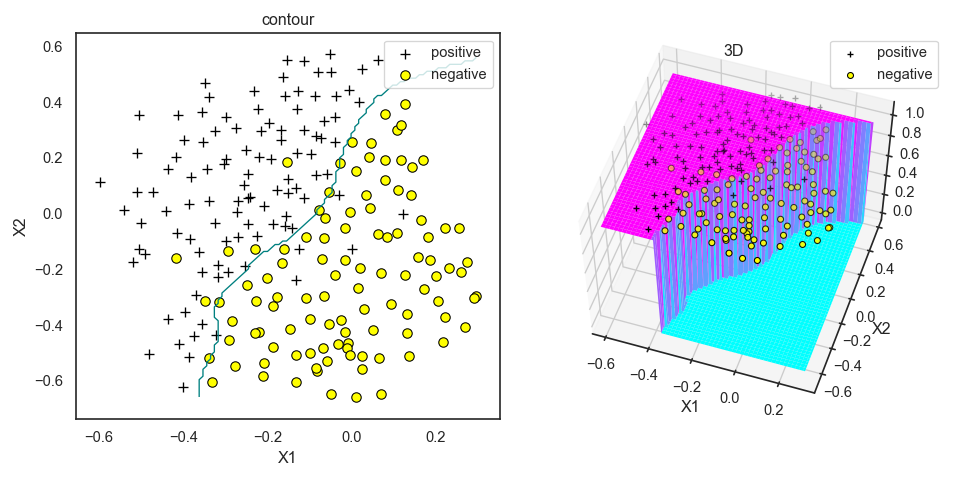

In [22]:
%matplotlib notebook
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig = plt.figure(dpi=80, figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.scatter(positive['X1'], positive['X2'], linewidth=1, s=50, c='black', marker='+', label='positive')
ax1.scatter(negative['X1'], negative['X2'], linewidth=0.8, s=50, c='yellow',edgecolors='black', marker='o', label='negative')
ax1.legend(loc=0)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('contour')
# Make classification predictions over a grid of values
X1 = np.mgrid[np.min(X[:,0]):np.max(X[:,0]):100j]
X2 = np.mgrid[np.min(X[:,1]):np.max(X[:,1]):100j]
vals = np.zeros([100, 100])
for i in range(100):
    for j in range(100):
        this_X = np.vstack((X1[i], X2[j])).T
        vals[i, j] = __.svmPredict(model, this_X);
ax1.contour(X1, X2, vals.T, [1], linewidths=1, colors='teal')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(positive['X1'], positive['X2'], 1.05, linewidth=1, s=20, c='black', marker='+', label='positive')
ax2.scatter(negative['X1'], negative['X2'], 1.05, linewidth=0.8, s=20, c='yellow',edgecolors='black', marker='o', label='negative')
ax2.legend(loc=0)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('3D')
X3, X4 = np.mgrid[np.min(X[:,0]):np.max(X[:,0]):100j, np.min(X[:,1]):np.max(X[:,1]):100j]
X3 = X3.T; X4 = X4.T;
ax2.plot_surface(X3, X4, vals.T, linewidth=0.2, edgecolors = 'none', cmap=plt.cm.cool)

fig.tight_layout()
plt.show()

# Part 2 : Spam Classification with SVMs
---

### Email Preprocessing
---
To use an SVM to classify emails into Spam v.s. Non-Spam, you first need to convert each email into a vector of features. In this part, you will implement the preprocessing steps for each email. You should complete the code in `processEmail` to produce a word indices vector for a given email.

### Feature Extraction
---
Now, you will convert each email into a vector of features in $R^n$.   
You should complete the code in emailFeatures.m to produce a feature vector for a given email.  

`processEmail` 已被重写，在练习最后面，有调用该方法处理自己的邮件，生成特征，并预测分类结果。

### Train Linear SVM for Spam Classification
---
In this section, you will train a linear classifier to determine if an email is Spam or Not-Spam.

In [5]:
# Loading train examples
mat = sio.loadmat('spamTrain.mat');
X = mat.get('X')
y = mat.get('y')
mat.keys(), X.shape, y.shape

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 (4000, 1899),
 (4000, 1))

In [6]:
# Training Linear SVM (Spam Classification)
# (this may take 1 to 2 minutes) ...
model = __.svmTrain(X, y, C=0.1, kernel='linear', sigma=0, tol=1e-3, max_passes=5)


Training ...
...................................................................

...............................................................................

...............................................................................

...............................................................................

................................... Done! 




In [7]:
p = __.svmPredict(model, X);
print('Training Accuracy: {0}'.format(np.mean((p == y)) * 100));

Training Accuracy: 97.35000000000001


### Test Spam Classification
---
After training the classifier, we can evaluate it on a test set.   
We have included a test set in spamTest.mat

In [8]:
# Loading test examples
mat = sio.loadmat('spamTest.mat');
Xtest = mat.get('Xtest')
ytest = mat.get('ytest')
mat.keys(), X.shape, y.shape

(dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']),
 (4000, 1899),
 (4000, 1))

In [9]:
# Evaluating the trained Linear SVM on a test set ...
p = __.svmPredict(model, Xtest);
print('Test Accuracy: {0}'.format(np.mean((p == ytest)) * 100));

Test Accuracy: 94.89999999999999


### 额外练习，使用sklearn的metrics统计精确度
---

In [17]:
from sklearn import metrics # try to use sklearn's metrics
print(metrics.classification_report(ytest, p));

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       692
           1       0.94      0.87      0.91       308

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.94      0.92      0.93      1000
weighted avg       0.94      0.94      0.94      1000



### 额外练习，使用sklearn的LogisticRegression在相同训练集上训练，并查看结果
---

In [18]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X, y)

c:\workspace\installed\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\workspace\installed\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Training accuracy = 94.4%
Test accuracy = 95.3%


In [20]:
ptrain = svc.predict(X)
ptest = svc.predict(Xtest)
print(metrics.classification_report(y, ptrain))
print(metrics.classification_report(ytest, ptest))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2723
           1       0.97      0.85      0.91      1277

   micro avg       0.94      0.94      0.94      4000
   macro avg       0.95      0.92      0.93      4000
weighted avg       0.95      0.94      0.94      4000

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       692
           1       0.98      0.87      0.92       308

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000



### 额外练习，使用sklearn的LogisticRegression在相同训练集上训练，并查看结果
---

In [12]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X, y)
p = logit.predict(Xtest)
from sklearn import metrics # try to use sklearn's metrics
print(metrics.classification_report(ytest, p));

c:\workspace\installed\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\workspace\installed\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



### 测试 np.argsort() / np.sort() / [::-1,:] / [:,::-1] / T 的使用方法
---
np.argsort(A, axis=0)  把 A 按列从小到大排序，返回排序后的元素索引位置  
np.argsort(A, axis=1)  把 A 按行从小到大排序，返回排序后的元素索引位置  
np.sort(A, axis=0)     把 A 按列从小到大排序，返回排序后的元素  
np.sort(A, axis=1)     把 A 按行从小到大排序，返回排序后的元素  
[::-1,:]               上下翻转  
[:,::-1]               左右反转  
T                      转置  

In [ ]:
# 演示示例，打印各种情况的结果
A = np.array([[1, 3, 2, 7], [2, 4, 1, 3], [6, 1, 2, 3]]) 

As1 = np.argsort(A, axis=0); print('np.argsort(A, axis=0) :'); print('o'+str(A)); print('s'+str(As1))
As2 = As1[::-1,:];           print('l'+str(As2))
As3 = As2[:,::-1];           print('h'+str(As3))
As4 = As3.T;                 print('t'+str(As4) + '\n')

As1 = np.argsort(A, axis=1); print('np.argsort(A, axis=1) :'); print('o'+str(A)); print('s'+str(As1))
As2 = As1[::-1,:];           print('l'+str(As2))
As3 = As2[:,::-1];           print('h'+str(As3))
As4 = As3.T;                 print('t'+str(As4) + '\n')

As1 = np.sort(A, axis=0);    print('np.sort(A, axis=0) :'); print('o'+str(A)); print('s'+str(As1))
As2 = As1[::-1,:];           print('l'+str(As2))
As3 = As2[:,::-1];           print('h'+str(As3))
As4 = As3.T;                 print('t'+str(As4) + '\n')

As1 = np.sort(A, axis=1);    print('np.sort(A, axis=1) :'); print('o'+str(A)); print('s'+str(As1))
As2 = As1[::-1,:];           print('l'+str(As2))
As3 = As2[:,::-1];           print('h'+str(As3))
As4 = As3.T;                 print('t'+str(As4) + '\n')

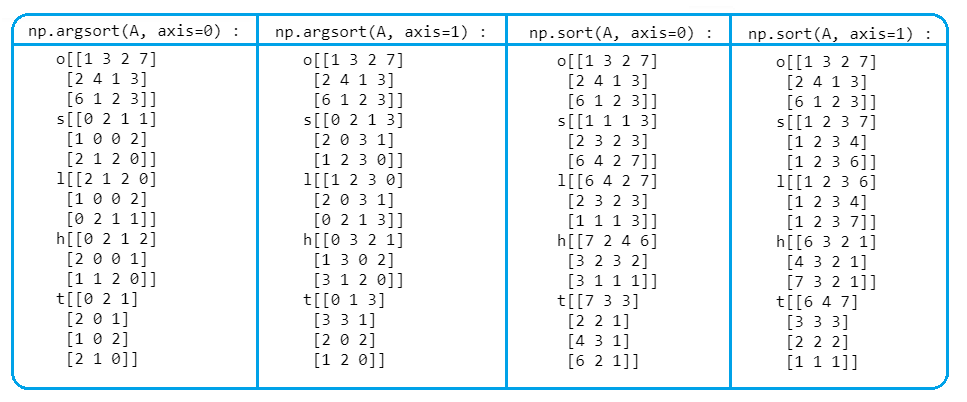

### Top Predictors of Spam
---
Since the model we are training is a linear SVM, we can inspect the weights learned by the model to understand better how it is determining whether an email is spam or not. The following code finds the words with the highest weights in the classifier. Informally, the classifier 'thinks' that these words are the most likely indicators of spam.

In [21]:
idx = np.argsort(model['w'], axis=0)[::-1,:] # Descending order
weight = model['w'][idx]
vocab = __.getVocabList()

In [36]:
print('\nTop predictors of spam:\n');
for i in range(15):print('\t{0}\t{1}'.format(vocab[str(idx[i][0])].ljust(10), weight[i,0,0]));


Top predictors of spam:

	remot     	2.844586835890159
	with      	2.4249737499187347
	wife      	2.0876707989079404
	hot       	2.045637117625336
	young     	2.0023670050509965
	mark      	1.995582360457771
	info      	1.9819726088802325
	els       	1.978129212268663
	gt        	1.9062693103898947
	player    	1.8924443548354106
	otherwis  	1.8854110406132323
	off       	1.847711594054737
	mondai    	1.8451973830867066
	doesn     	1.7626215827103808
	commun    	1.7440896214230808


# Try Your Own Emails
---
Now that you've trained the spam classifier, you can use it on your own emails! In the starter code, we have included spamSample1.txt, spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. The following code reads in one of these emails and then uses your learned SVM classifier to determine whether the email is Spam or Not Spam

In [10]:
# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on different emails types). 
# Try your own emails as well!

filename = 'spamSample1.txt';
#filename = 'spamSample2.txt';
#filename = 'emailSample1.txt';
#filename = 'emailSample1.txt';

重写了 Octave 版的 processEmail 方法来处理自己的email，使之转化为特征（我的版本在该方法中直接返回特征），然后可被预测分类。其中字根提取的那个方法略过了，在debugging过程发现Octave版的字根提取并没有生效，所以此处也掠过了，需要下载原C版本的字根提取函数可在pdf练习说明文件中找到相关连接。至此，还有存在问题，因为预测都是1，暂时不深入了解了。之后有机会再去debug它吧。

In [11]:
X_features = __.processEmail(__.readFile(filename)); X_features.shape

(1, 1899)

In [12]:
# Read and predict
p = __.svmPredict(model, X_features); 
print('Processed {0}\n\nSpam Classification: {1}\n'.format(filename, p));
print('(1 indicates spam, 0 indicates not spam)\n\n');

Processed spamSample1.txt

Spam Classification: [[1.]]

(1 indicates spam, 0 indicates not spam)


